# Natural Language Processing with Disaster Tweets

<img src="https://www.kaggle.com/competitions/17777/images/header">

Bu projemizde atılan tweet'lerin gereck bir felaketle ilgli mi yoksa sahte mi olduğunu bulacağız.

<a href="https://www.kaggle.com/competitions/nlp-getting-started/data">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.sample(5)

,id,keyword,location,text,target
2905,4172,drown,Portugal,I can't drown my demons they know how to swim,1
4703,6687,landslide,The Circle of Life,So when you're caught in a landslide\nI'll be ...,0
1023,1485,body%20bags,WESTSIDE OF PHILLY 7? BLOCK??,Ain't no bags in the trunk it's a body,0
5173,7378,obliterate,NaN,Wondering if gold could gap up $50 on the jobs...,0
1540,2225,chemical%20emergency,"Las Vegas, Nevada",Bomb Crash Loot Riot Emergency Pipe Bomb Nucle...,1


In [4]:
df.shape

(7613, 5)

In [5]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
df["keyword"].nunique()

221

In [7]:
df=df[["text","target"]]

In [8]:
df.sample(3)

,text,target
5367,'If plan A does not work don't panic bc there ...,0
7337,Is LA at Risk for a Giant Wildfire? - Which Wa...,1
726,Keep thinking about it until I stepped on a br...,0


<Axes: xlabel='target', ylabel='count'>

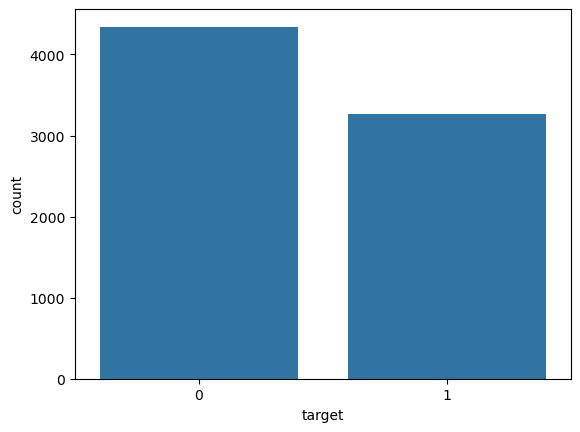

In [9]:
sns.countplot(x=df["target"])


### WordCloud

In [10]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [11]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS)
    wc.generate(" ".join(data))  # join Metindeki satırları birleştiri - generate En çok tekrar edenleri saydı
    plt.imshow(wc)
    plt.axis("off")

In [12]:
disaster  = df[df["target"]==1]["text"]
not_disaster = df[df["target"]==0]["text"]

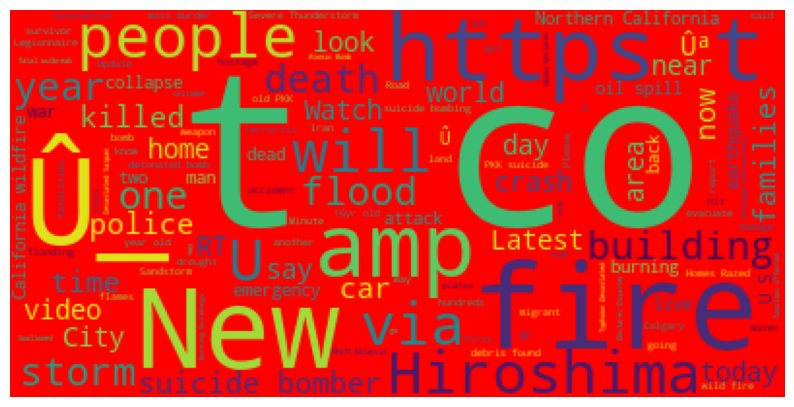

In [13]:
wc(disaster,"red")

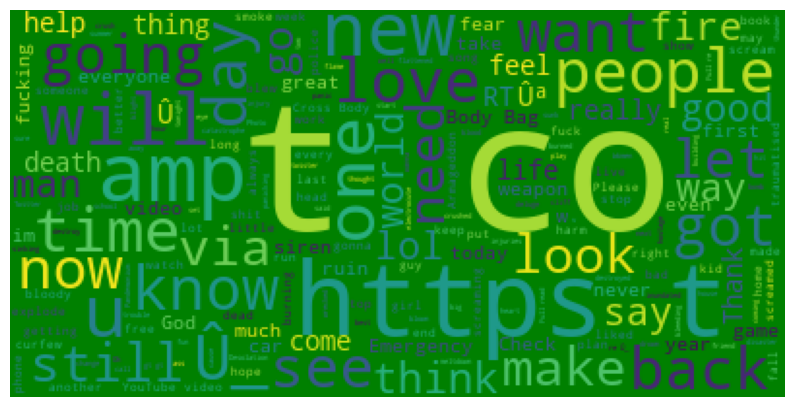

In [49]:
wc(not_disaster,"green")

### Pipeline

In [15]:
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [16]:
x=df["text"]
y=df["target"]

In [17]:
clf=Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier())])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [19]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [20]:
y_pred=clf.predict(x_test)

In [21]:
accuracy_score(y_test,y_pred)

0.7851890756302521

In [22]:
confusion_matrix(y_test,y_pred)

array([[1023,   68],
       [ 341,  472]], dtype=int64)

<Axes: >

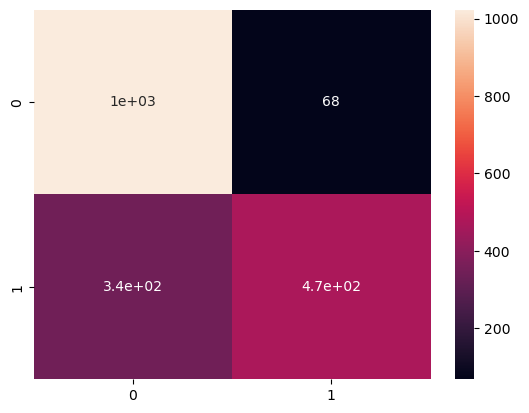

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [24]:
from sklearn.svm import SVC

In [25]:
svm=Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC())])

In [26]:
svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', SVC())])

In [27]:
y_pred=svm.predict(x_test)

In [28]:
accuracy_score(y_test,y_pred)

0.8151260504201681

<Axes: >

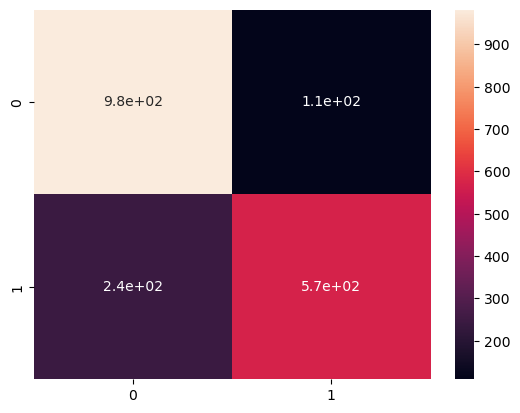

In [29]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [30]:
x_test.iloc[568] 

'Finnish ministers: Fennovoima nuclear reactor will go ahead http://t.co/mqMCOLwBzc'

In [31]:
y_test.iloc[568]

0

In [32]:
text='Finnish ministers: Fennovoima nuclear reactor will go ahead http://t.co/mqMCOLwBzc'

In [33]:
print(svm.predict([text])) 

[0]


In [34]:
import pickle

# Modeli kaydetme
with open('disaster.pkl', 'wb') as file:
    pickle.dump(svm, file)

In [40]:
test=pd.read_csv("test.csv")

In [41]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [42]:
tahmin=test["id"]

In [43]:
test=test["text"]

In [44]:
thmn=svm.predict(test)

In [45]:
tahmin=pd.DataFrame(tahmin)

In [46]:
tahmin["target"]=thmn

In [47]:
tahmin

,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [52]:
tahmin.to_csv("tahmin.csv", index=False)

Sonuc olarak tweet in bir felaketle ilgili olup olmadigini tespit eden bir model yaptık Modelimiz Kaggle da %79.374 Puan aldı. Sonra da modelimizi streamlit uygulaması yapmak üzere kaydettik. 